# Work Scheduling problem

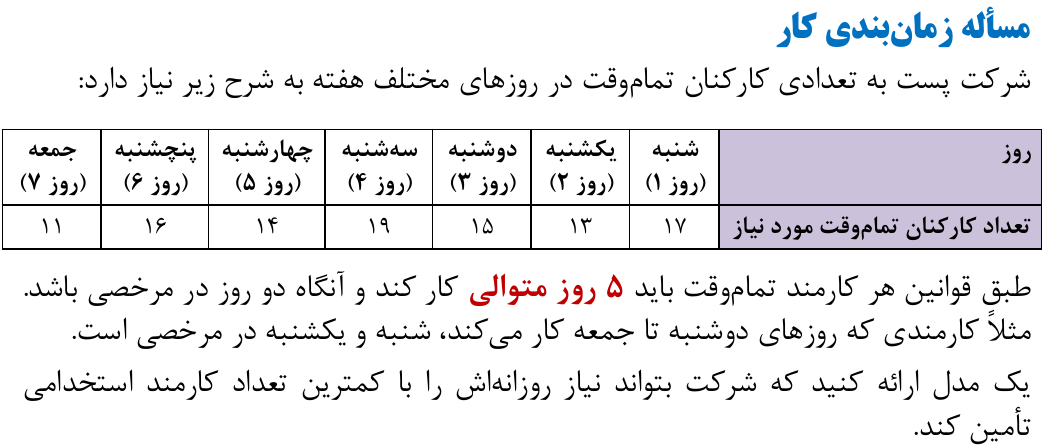

## Answer

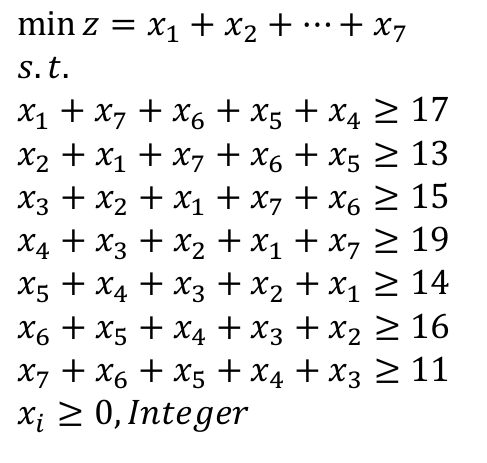

now we convert this rules to this sigma

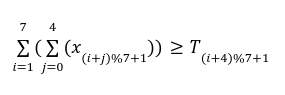

## Implementation

In [94]:
# import pyomo
import pyomo.environ as pyo
import math

In [95]:
# Create concenterate model 
model = pyo.ConcreteModel()
# define sets for sigma notation
model.iset=pyo.Set(initialize=[i for i in range(1,8)])
model.jset=pyo.Set(initialize=[j for j in range(5)])

In [96]:
# define rule bound for x
def rule_bound_x(model,i):
    return (0,math.inf)

In [97]:
# define variables
model.x=pyo.Var(model.iset,domain = pyo.NonNegativeIntegers,bounds=rule_bound_x)

In [98]:
# define obj rule

def obj_rule(model):
    return sum(model.x[i] for i in model.iset)
model.obj=pyo.Objective(rule=obj_rule,sense = pyo.minimize)


In [99]:

# define cost dics for constraint
costs = {
    1:17,
    2:13,
    3:15,
    4:19,
    5:14,
    6:16,
    7:11
}
def const1_rule(model,i):
    return costs[(i+4)%7+1] <= sum(model.x[(i+j)%7+1] for j in model.jset) 
model.const1=pyo.Constraint(model.iset,rule=const1_rule)     
for i in model.iset:
   print(costs[(i+4)%7+1] <= sum(model.x[(i+j)%7+1] for j in model.jset) )
    

    

16  <=  x[2] + x[3] + x[4] + x[5] + x[6]
11  <=  x[3] + x[4] + x[5] + x[6] + x[7]
17  <=  x[4] + x[5] + x[6] + x[7] + x[1]
13  <=  x[5] + x[6] + x[7] + x[1] + x[2]
15  <=  x[6] + x[7] + x[1] + x[2] + x[3]
19  <=  x[7] + x[1] + x[2] + x[3] + x[4]
14  <=  x[1] + x[2] + x[3] + x[4] + x[5]


In [100]:
result=pyo.SolverFactory('glpk').solve(model,'glpk',keepfiles=True,tee=True)
# print (str(result.solver))
# print (str(result.solver.status))
# print (str(result.solver.termination_condition))
model.display()

Solver log file: '/tmp/tmpcpmsy9go.glpk.log'
Solver solution file: '/tmp/tmp007j82nm.glpk.raw'
Solver problem files: ('/tmp/tmp0fq3avx9.pyomo.lp',)
GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /tmp/tmp007j82nm.glpk.raw --wglp /tmp/tmp4iutnxq9.glpk.glp --cpxlp
 /tmp/tmp0fq3avx9.pyomo.lp
Reading problem data from '/tmp/tmp0fq3avx9.pyomo.lp'...
8 rows, 8 columns, 36 non-zeros
7 integer variables, none of which are binary
90 lines were read
Writing problem data to '/tmp/tmp4iutnxq9.glpk.glp'...
78 lines were written
GLPK Integer Optimizer, v4.65
8 rows, 8 columns, 36 non-zeros
7 integer variables, none of which are binary
Preprocessing...
7 rows, 7 columns, 35 non-zeros
7 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 7
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
7 rows,